# 01 - Data Exploration (EDA)

This notebook explores the SleepSense India dataset.  
Goals:
- Load the dataset and inspect shape & columns
- Check missing values and duplicates
- Visualize target distribution and main predictors
- Check correlations and basic multicollinearity signals
- Detect obvious outliers and record actions for preprocessing
- Save EDA visuals to `reports/EDA_visuals/` for the final report

I keep explanations concise and actionable so the modeling notebooks can use the cleaned observations.


In [8]:
# I import the basic libraries and set the file path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

DATA_PATH = "../data/raw/SleepSense_India_Full.csv"
OUT_DIR = "../reports/EDA_visuals"
import os
os.makedirs(OUT_DIR, exist_ok=True)


Inference: I prepared the tools and folder for plots.

In [9]:
# I read the CSV and show first 5 rows
df = pd.read_csv(DATA_PATH)
df.head()


,city,age,sex,family_size,work_hours,avg_sleep_hours,screen_time_hours,tea_cups,coffee_cups,late_snack,...,physical_activity_min,bedtime_variability,stress_level,city_noise_dB,light_pollution_index,temperature_night,humidity_night,air_quality_index,screen_brightness_behavior,sleep_quality_score
0,Thrissur,25.3,Female,4,11.6,4.79,3.69,3,1,0,...,0.9,0.25,5.37,65.97,46.18,27.73,53.42,179.7,0.29,38.42
1,Kolkata,49.0,Female,2,12.3,5.82,2.71,0,2,0,...,0.0,0.43,3.41,57.56,57.09,21.27,50.00,144.7,0.31,48.63
2,Varanasi,16.4,Female,4,9.0,6.15,1.21,0,0,1,...,78.9,1.57,3.99,61.37,31.77,28.02,73.11,69.4,0.73,52.90
3,Jaipur,18.9,Female,4,10.4,6.81,2.33,1,3,1,...,51.1,1.48,6.35,66.66,69.69,27.73,34.59,171.3,0.15,45.61
4,Nanded,47.1,Male,5,9.3,6.73,1.91,4,0,0,...,57.5,0.84,3.39,39.77,53.15,32.31,47.88,52.2,0.82,63.37


Inference: I can see columns and a sample of rows to understand the data shape.

In [10]:
# I check number of rows, columns and data types
print("rows, columns:", df.shape)
print("\ncolumn types:\n", df.dtypes)


rows, columns: (12000, 23)

column types:
 city                           object
age                           float64
sex                            object
family_size                     int64
work_hours                    float64
avg_sleep_hours               float64
screen_time_hours             float64
tea_cups                        int64
coffee_cups                     int64
late_snack                      int64
spice_intake                    int64
religious_freq                  int64
festival_freq                   int64
physical_activity_min         float64
bedtime_variability           float64
stress_level                  float64
city_noise_dB                 float64
light_pollution_index         float64
temperature_night             float64
humidity_night                float64
air_quality_index             float64
screen_brightness_behavior    float64
sleep_quality_score           float64
dtype: object


Inference: I note how many samples exist and which columns are numeric vs text.

In [11]:
# I get summary stats for numeric columns
df.describe().T.round(3)


,count,mean,std,min,25%,50%,75%,max
age,12000.0,30.464,9.317,16.00,23.300,30.100,36.900,74.80
family_size,12000.0,3.667,1.237,1.00,3.000,4.000,4.000,6.00
work_hours,12000.0,9.399,1.574,4.00,8.300,9.400,10.500,15.10
avg_sleep_hours,12000.0,6.715,1.124,3.00,5.960,6.720,7.480,10.00
screen_time_hours,12000.0,2.327,1.026,0.00,1.620,2.290,3.000,6.39
tea_cups,12000.0,2.091,1.524,0.00,1.000,2.000,3.000,9.00
coffee_cups,12000.0,0.726,0.935,0.00,0.000,0.000,1.000,7.00
late_snack,12000.0,0.399,0.490,0.00,0.000,0.000,1.000,1.00
spice_intake,12000.0,3.312,1.057,1.00,3.000,3.000,4.000,5.00
religious_freq,12000.0,2.611,1.701,0.00,1.000,2.000,4.000,11.00


### Sleep & Lifestyle Insights Summary

1. Most people are **young adults (~30 years old)** with small families (3–4 members).  
2. They work **around 9–10 hours/day** and sleep **about 6.7 hours**, which is **less than ideal**.  
3. **Screen time (~2–3 hrs)** and **late-night snacking** may reduce sleep quality.  
4. **Tea is more common** than coffee, and **spicy food intake is high**.  
5. **Stress level (~5/10)** and **irregular bedtime** suggest moderate lifestyle pressure.  
6. **City noise (≈61 dB)** and **light pollution** are quite high — could disturb sleep.  
7. **Air quality is moderate (AQI ≈93)** — not very healthy but manageable.  
8. **Sleep quality score (~53/100)** indicates **average or below-average sleep health**.  
9. People with **lower screen time, stable routines, and more physical activity** likely sleep better.


In [12]:
# I check missing values and duplicates
miss = df.isnull().sum()
print("missing counts (only >0 shown):")
print(miss[miss>0])

dups = df.duplicated().sum()
print("\nduplicate rows:", dups)


missing counts (only >0 shown):
Series([], dtype: int64)

duplicate rows: 0


Inference: If missing values appear, I will impute; if duplicates exist, I will remove exact duplicates later and reset index as well.

<function matplotlib.pyplot.show(close=None, block=None)>

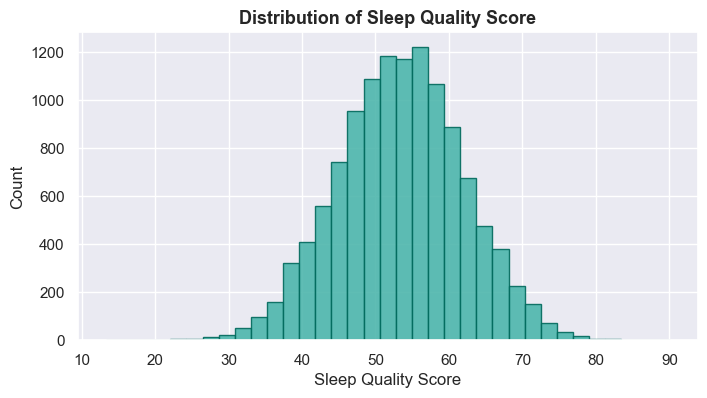

In [29]:
import matplotlib.pyplot as plt
import os

# Target column
target = "sleep_quality_score"

# Plot target distribution
plt.figure(figsize=(8, 4))
plt.hist(
    df[target].dropna(),
    bins=35,
    color="#4DB6AC",        # soft teal color
    edgecolor="#00695C",    # darker teal edges for contrast
    alpha=0.9
)
plt.title("Distribution of Sleep Quality Score", fontsize=13, fontweight='bold')
plt.xlabel("Sleep Quality Score")
plt.ylabel("Count")

# Save the figure
plt.savefig(os.path.join(OUT_DIR, "target_distribution.png"), dpi=120, bbox_inches='tight')

# Show the plot
plt.show


In [31]:
df["sleep_quality_score"].skew()

np.float64(-0.025026856998531022)

Inference: The histogram shows whether the target is roughly normal or skewed; mean/std give scale.
It is more or less looking normal with negative skew -0.02
- we can also confirm it with help of shaphiro test of normality

In [33]:
from scipy import stats
stats.shapiro(df['sleep_quality_score']).pvalue>0.05

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12000.
  res = hypotest_fun_out(*samples, **kwds)


np.True_

INFERENCE :- it is true which confirm that this is normally distributed data

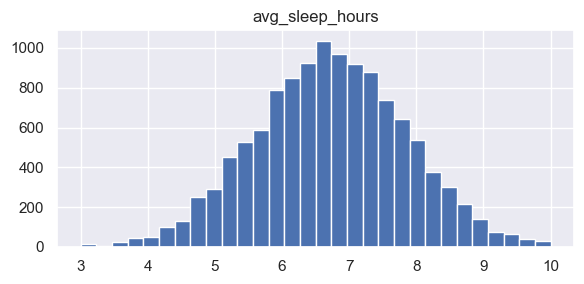

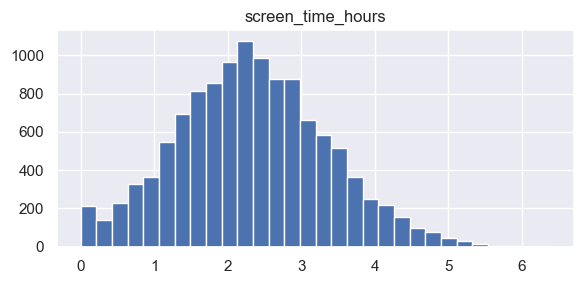

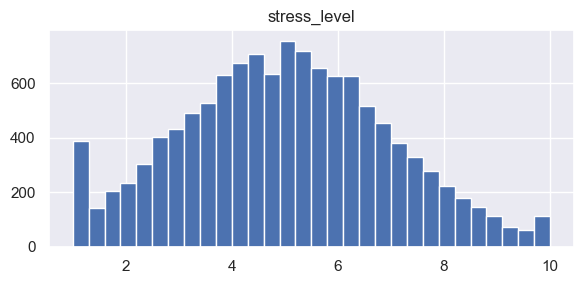

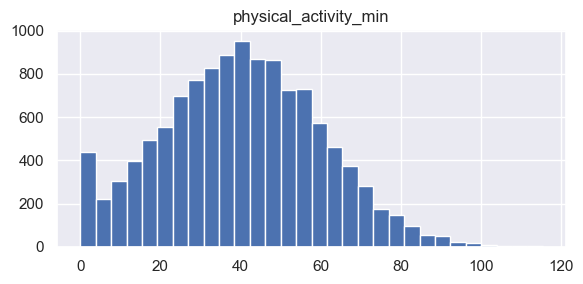

In [34]:
# I show simple histograms for a few key numeric columns
cols = ["avg_sleep_hours","screen_time_hours","stress_level","physical_activity_min"]
for c in cols:
    if c in df.columns:
        plt.figure(figsize=(6,3))
        plt.hist(df[c].dropna(), bins=30)
        plt.title(c)
        plt.tight_layout()
        plt.savefig(os.path.join(OUT_DIR, f"dist_{c}.png"), dpi=100)
        plt.show()


Inference: These plots help judge ranges, skewness, and if scaling will be needed. thheir is some outliers exist in this columns which may affect this model building in future so we should go for scalling

city
Pune         509
Mumbai       496
Surat        496
Hyderabad    490
Chennai      488
Kolkata      478
Delhi        476
Jaipur       475
Bengaluru    474
Ahmedabad    462
Name: count, dtype: int64


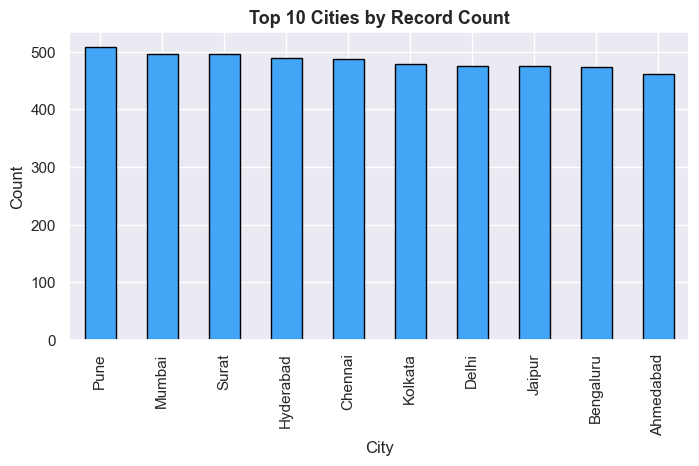

In [36]:
# Count top 10 cities
city_counts = df['city'].value_counts().head(10)

# Print the counts
print(city_counts)

# Plot the city distribution
plt.figure(figsize=(8, 4))
city_counts.plot(kind='bar', color='#42A5F5', edgecolor='black')
plt.title("Top 10 Cities by Record Count", fontsize=13, fontweight='bold')
plt.xlabel("City")
plt.ylabel("Count")

# Save the figure
plt.savefig(os.path.join(OUT_DIR, "city_distribution.png"), dpi=120, bbox_inches='tight')

# Show the plot
plt.show()


Inference: City distribution shows if some cities dominate the data and may need grouping.

In [42]:
# I compute simple correlations with the target
num = df.select_dtypes(include=[np.number])
corr_with_target = num.corr()[target].drop(target).sort_values(key=abs, ascending=False)
corr_with_target.round(3)


stress_level                 -0.487
avg_sleep_hours               0.486
screen_time_hours            -0.280
religious_freq                0.202
light_pollution_index        -0.194
air_quality_index            -0.194
tea_cups                      0.193
city_noise_dB                -0.188
coffee_cups                  -0.177
work_hours                   -0.154
family_size                   0.121
temperature_night             0.082
late_snack                   -0.080
age                          -0.077
humidity_night                0.066
bedtime_variability          -0.052
physical_activity_min         0.046
festival_freq                 0.014
spice_intake                 -0.003
screen_brightness_behavior    0.001
Name: sleep_quality_score, dtype: float64

Inference: Highest absolute correlations point to features to try first in models.

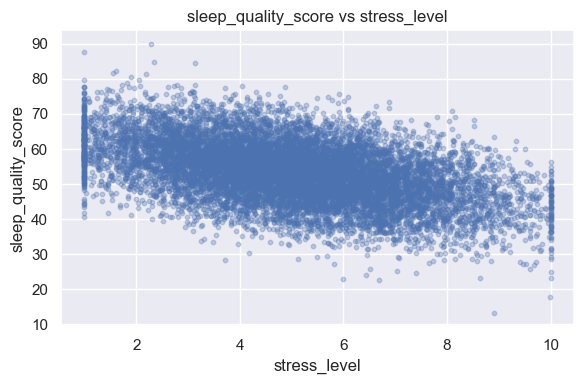

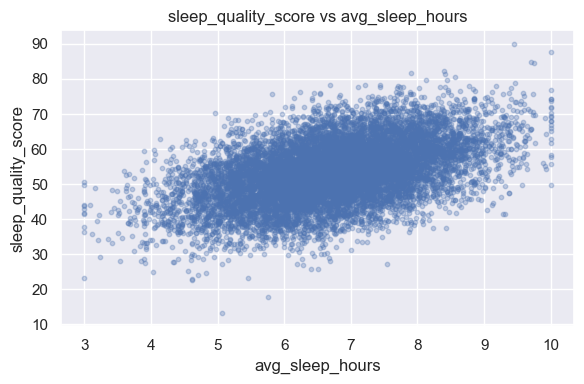

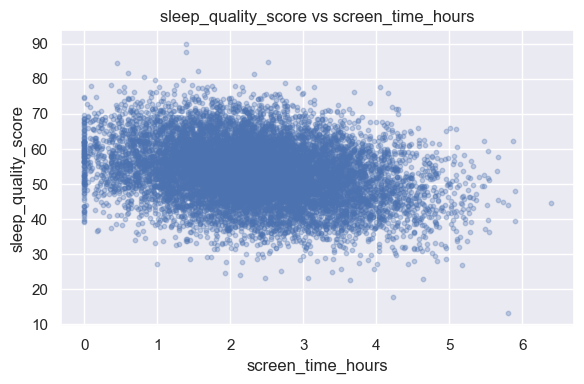

In [43]:
# I plot scatter plots for top 3 correlated numeric features
top_feats = corr_with_target.abs().nlargest(3).index.tolist()
for f in top_feats:
    plt.figure(figsize=(6,4))
    plt.scatter(df[f], df[target], alpha=0.3, s=10)
    plt.xlabel(f)
    plt.ylabel(target)
    plt.title(f"{target} vs {f}")
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, f"scatter_{f}.png"), dpi=120)
    plt.show()


Inference: Scatter plots show if relationships look linear and if outliers exist.

In [45]:
# I count outliers using IQR for chosen numeric columns
def count_iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    return ((series < low) | (series > high)).sum()

outlier_report = {}
for c in cols:
    if c in df.columns:
        outlier_report[c] = count_iqr_outliers(df[c].dropna())

outlier_report


{'avg_sleep_hours': np.int64(68),
 'screen_time_hours': np.int64(68),
 'stress_level': np.int64(0),
 'physical_activity_min': np.int64(40)}

Inference: Columns with large outlier counts will be checked during preprocessing.

In [46]:
# I save a short EDA summary for reference
summary = {
    "n_rows": len(df),
    "n_cols": df.shape[1],
    "n_duplicates": int(df.duplicated().sum()),
    "target_mean": float(df[target].mean()),
    "target_std": float(df[target].std())
}
pd.DataFrame([summary]).to_csv("../reports/EDA_summary_simple.csv", index=False)
print("Saved summary to ../reports/EDA_summary_simple.csv")


Saved summary to ../reports/EDA_summary_simple.csv


Inference: This file records the base stats for later notebooks.

### Short plan after EDA
I will:
- Impute any notable missing values (median for numeric, mode for categorical).
- Remove exact duplicates if present.
- Handle outliers by capping or transformation based on domain view.
- Encode `city` and `sex` simply (one-hot or label) and scale numeric features before modeling.
